<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Purpose</a></span></li></ul></li><li><span><a href="#Preparing-the-data-sets" data-toc-modified-id="Preparing-the-data-sets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing the data sets</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Print-first-and-last-rows-of-data" data-toc-modified-id="Print-first-and-last-rows-of-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Print first and last rows of data</a></span></li></ul></li><li><span><a href="#Visualize-the-number-of-dog-images-vs-coyotes" data-toc-modified-id="Visualize-the-number-of-dog-images-vs-coyotes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize the number of dog images vs coyotes</a></span></li><li><span><a href="#Show-random-sample-of-data" data-toc-modified-id="Show-random-sample-of-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Show random sample of data</a></span></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train Model</a></span></li><li><span><a href="#Overfitting-Refinement" data-toc-modified-id="Overfitting-Refinement-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Overfitting Refinement</a></span></li><li><span><a href="#Validation" data-toc-modified-id="Validation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Validation</a></span></li><li><span><a href="#Traning-Generator" data-toc-modified-id="Traning-Generator-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Traning Generator</a></span><ul class="toc-item"><li><span><a href="#Validation-Generator" data-toc-modified-id="Validation-Generator-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Validation Generator</a></span></li></ul></li><li><span><a href="#See-how-our-generator-work" data-toc-modified-id="See-how-our-generator-work-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>See how our generator work</a></span></li><li><span><a href="#Fit-Model" data-toc-modified-id="Fit-Model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Fit Model</a></span></li></ul></div>

# Table of Contents

## Purpose

The purpose of this notebook is to take random images of dogs and coyotes and train the computer to be able to tell the difference.

We will be exposed to deep learning concepts. Python libraries that are new to us are tensorflow and keras for executing these models. 


In [89]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import random 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential #Sequential model is a linear stack of layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization



#Your task - train a deep learning model that can accurately distinguish coyotes from dogs based on photos.

# Preparing the data sets

In [90]:
# preparing data sets for the project
train_data = "./train"
test_data = "./test"

# settingt the images width and height
img_width = 150
img_height = 150

In [91]:
#Create dataframe of train data set 
filenames = os.listdir(train_data)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
dog_coy_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})



# Data Exploration

## Print first and last rows of data


First we will look at a piece of the training data to see make sure we know what our data looks like. Our dataframe has one column with the filename, and one column that labels the image as a 1(dog) or a 0(coyote).

In [92]:
print(dog_coy_df)

            filename  category
0       dog.8011.jpg         1
1       dog.7322.jpg         1
2       dog.1753.jpg         1
3       dog.5535.jpg         1
4       dog.3144.jpg         1
...              ...       ...
13450   dog.6025.jpg         1
13451   dog.8008.jpg         1
13452   dog.1992.jpg         1
13453  dog.12412.jpg         1
13454  image1217.png         0

[13455 rows x 2 columns]


In [93]:
#print first and last 5 rows of data frame
dog_coy_df.head()

,filename,category
0,dog.8011.jpg,1
1,dog.7322.jpg,1
2,dog.1753.jpg,1
3,dog.5535.jpg,1
4,dog.3144.jpg,1


In [94]:
#print last 5 rows of dataframe
dog_coy_df.tail()

,filename,category
13450,dog.6025.jpg,1
13451,dog.8008.jpg,1
13452,dog.1992.jpg,1
13453,dog.12412.jpg,1
13454,image1217.png,0


# Visualize the number of dog images vs coyotes

We know that there are more dog than coyote images. But lets just take a look at the difference is so we can better understand our data. Having such a larger amount of dog images is not ideal, but we will continue on with what we have. Still, we want to keep that fact in mind, and be aware of it.

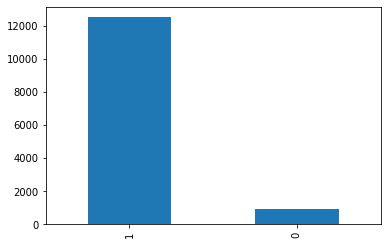

In [95]:
#Print plot with category values, Dogs: 1 Coyotes: 0
dog_coy_df['category'].value_counts().plot.bar()

# Show random sample of data

Showing a random sample of the data is helpful because it can tell us more about our data besides the fact there are dogs and coyotes in them. Sometimes the data has characteristics we woud not normally think about. For example, some images have humans in them, multiple dogs or coyotes, or fences and gates. It is good to keep these things in mind when creating a model for our data.

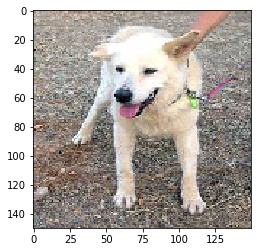

In [96]:
#showing random sample of images

sample = random.choice(filenames)
image = load_img("./train/"+sample)
new_image = image.resize((img_width, img_height))
plt.imshow(new_image)

# Train Model

This is where we process images and do a bunch of training stuff that I dont understand yet.

In [97]:
# initializing the model
model = Sequential()

#adding layers via the .add() method

#The activation parameter to the Conv2D class is simply a 
#convenience parameter which allows you to supply a string, 
#which specifies the name of the activation function you want to apply after performing the convolution.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))

#Batch normalization is used to stabilize and perhaps accelerate the learning process. 
model.add(BatchNormalization())

#A pooling layer is a new layer added after the convolutional layer. 
#Specifically, after a nonlinearity (e.g. ReLU) has been applied to the feature maps output 
#by a convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#Dropout is a technique used to prevent a model from overfitting.
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#A flatten operation on a tensor reshapes the tensor to have the shape that is equal to 
#the number of elements contained in tensor non including the batch dimension.
model.add(Flatten())

#A dense layer is just a regular layer of neurons in a neural network.
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)       

# Overfitting Refinement

In [98]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [99]:
dog_coy_df['category'] = dog_coy_df['category'].replace({0: 'coyote', 1: 'dog'})

# Validation

In [100]:
train_df, validate_df = train_test_split(dog_coy_df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

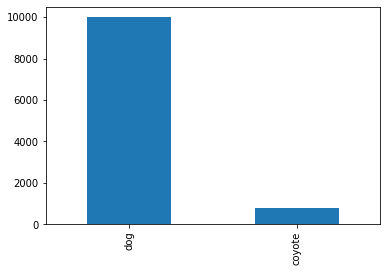

In [101]:
train_df['category'].value_counts().plot.bar()

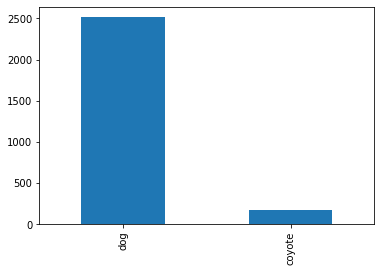

In [102]:
validate_df['category'].value_counts().plot.bar()

In [103]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Traning Generator

In [110]:
FAST_RUN = False
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    train_data, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 10764 validated image filenames belonging to 2 classes.


## Validation Generator

In [111]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    train_data, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2690 validated image filenames belonging to 2 classes.


# See how our generator work

In [112]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    train_data, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


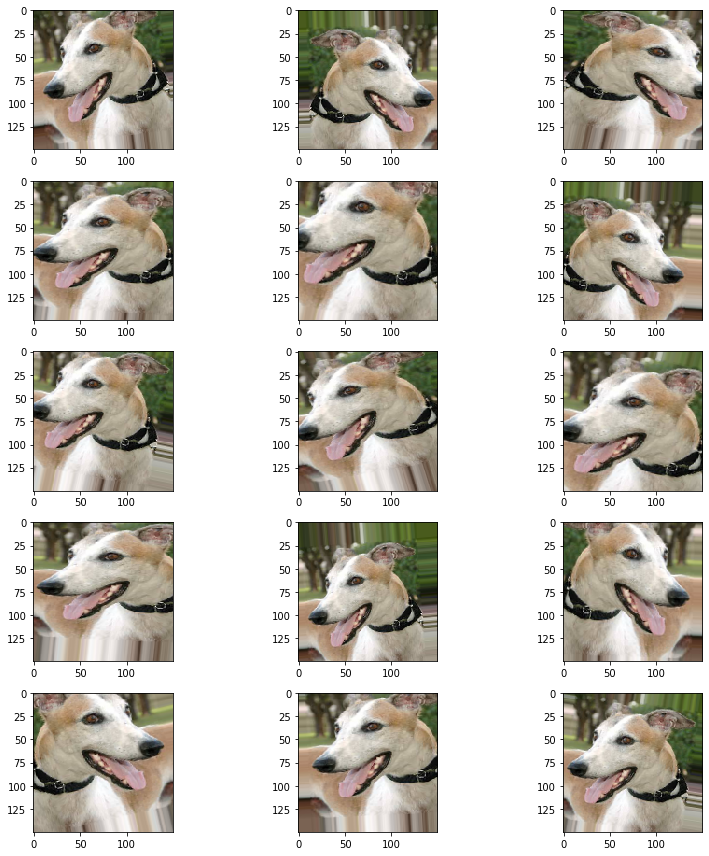

In [113]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit Model

In [114]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
epochs=3 if FAST_RUN else 15
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
717/717 [==============================] - 501s 698ms/step - loss: 0.3853 - accuracy: 0.8758 - val_loss: 0.8317 - val_accuracy: 0.5169
Epoch 2/50


/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


717/717 [==============================] - 498s 695ms/step - loss: 0.2172 - accuracy: 0.9284 - val_loss: 0.0919 - val_accuracy: 0.9391
Epoch 3/50
717/717 [==============================] - 506s 706ms/step - loss: 0.1843 - accuracy: 0.9366 - val_loss: 0.0743 - val_accuracy: 0.9387
Epoch 4/50
717/717 [==============================] - 502s 700ms/step - loss: 0.1806 - accuracy: 0.9381 - val_loss: 0.0162 - val_accuracy: 0.9507
Epoch 5/50
717/717 [==============================] - 492s 687ms/step - loss: 0.1701 - accuracy: 0.9409 - val_loss: 0.2382 - val_accuracy: 0.8841
Epoch 6/50
717/717 [==============================] - 500s 697ms/step - loss: 0.1714 - accuracy: 0.9423 - val_loss: 0.1702 - val_accuracy: 0.9260
Epoch 7/50
717/717 [==============================] - 512s 714ms/step - loss: 0.1636 - accuracy: 0.9458 - val_loss: 0.1307 - val_accuracy: 0.9450
Epoch 8/50
717/717 [==============================] - 490s 683ms/step - loss: 0.1625 - accuracy: 0.9442 - val_loss: 0.2026 - val_accura

In [117]:
model.save_weights("model.h5")

KeyError: 'acc'

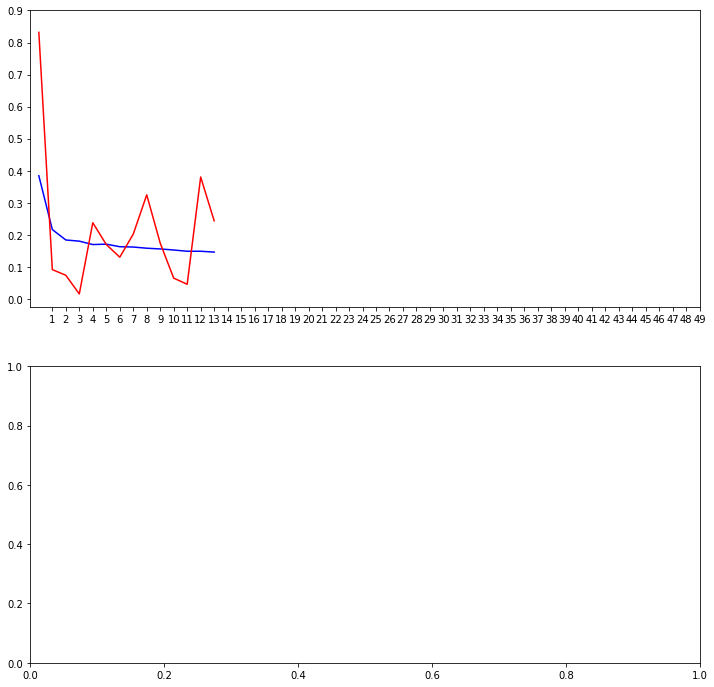

In [118]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()
